In [11]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
import pandas as pd # Appends the given string to a file, encoded in UTF-8.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 13, Finished, Available)

In [4]:
pip install wordcloud

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 6, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 4.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 7, Finished, Available)

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
# Load data into pandas DataFrame from "/lakehouse/default/" + "Files/yelp.csv"
df = pd.read_csv("/lakehouse/default/" + "Files/yelp.csv")
display(df)


StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 8, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


SynapseWidget(Synapse.DataFrame, c2e17d29-292c-4b6b-ae39-5ec69e0d5b4c)

In [7]:
df.info()

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 9, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [9]:
df['text length'] = df['text'].apply(len)
df.head()

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 11, Finished, Available)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 14, Finished, Available)

(-0.5, 399.5, 199.5, -0.5)

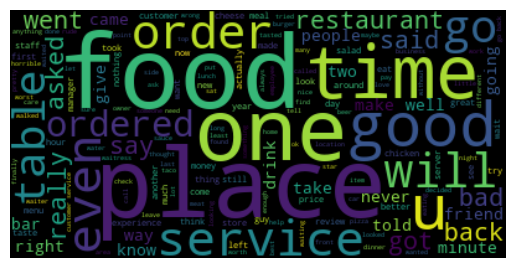

In [12]:
# word cloud for the 1-star reviews
one_star = df[df['stars'] == 1]

one_star_text = ' '.join(one_star['text'])

from wordcloud import WordCloud
one_star_cloud = WordCloud().generate(one_star_text)
plt.imshow(one_star_cloud, interpolation='bilinear')
plt.axis('off')

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 15, Finished, Available)

(-0.5, 399.5, 199.5, -0.5)

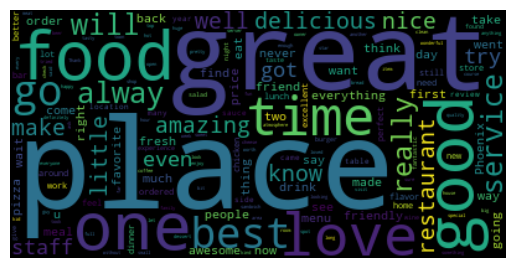

In [13]:
# word cloud for the 1-star reviews
one_star = df[df['stars'] == 5]

one_star_text = ' '.join(one_star['text'])

from wordcloud import WordCloud
one_star_cloud = WordCloud().generate(one_star_text)
plt.imshow(one_star_cloud, interpolation='bilinear')
plt.axis('off')

In [14]:
df['stars'].value_counts()

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 16, Finished, Available)

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [15]:
# remove 2 and 4 star reviews
df = pd.concat([df[df['stars']==5], df[df['stars']==3], df[df['stars']==1]])
df['stars'].value_counts()

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 17, Finished, Available)

5    3337
3    1461
1     749
Name: stars, dtype: int64

In [16]:
# create a new dataframe with only the text and stars columns
df = df[['text', 'stars', 'text length', 'cool', 'useful', 'funny']]
df.head()

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 18, Finished, Available)

,text,stars,text length,cool,useful,funny
0,My wife took me here on my birthday for breakf...,5,889,2,5,0
1,I have no idea why some people give bad review...,5,1345,0,0,0
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,419,1,2,0
4,General Manager Scott Petello is a good egg!!!...,5,469,0,0,0
6,Drop what you're doing and drive here. After I...,5,1565,7,7,4


In [17]:
# data preprocessing - remove punctuation and stopwords
import string
import nltk

nltk.download('stopwords')

def text_process(text):
    # remove punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    from nltk.corpus import stopwords
    
    # stem the words
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    return [ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# data preprocessing - apply the text_process function to the text column
df['text'].head(5).apply(text_process)

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 19, Finished, Available)

[nltk_data] Downloading package stopwords to /home/trusted-service-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [wife, took, birthday, breakfast, excel, weath...
1    [idea, peopl, give, bad, review, place, goe, s...
3    [rosi, dakota, love, chaparr, dog, park, conve...
4    [gener, manag, scott, petello, good, egg, go, ...
6    [drop, your, drive, ate, go, back, next, day, ...
Name: text, dtype: object

In [18]:
# features and labels
X = df['text']
y = df['stars']

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 20, Finished, Available)

In [19]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3)

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 21, Finished, Available)

In [20]:
# import the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
tfidf = TfidfTransformer()
# w2v_transformer = Word2VecTransformer(model_path='word2vec.txt')
nb = MultinomialNB()

from sklearn.pipeline import Pipeline

# create a pipeline
pipe = Pipeline([('vectorizer', vectorizer), ('tfidf', tfidf), ('nb', nb)])

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# make predictions on the test data
predictions = pipe.predict(X_test)

# model accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 22, Finished, Available)

1.0


In [32]:
# define the hyperparameters to search over
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

parameters = {
    'vectorizer__max_features': [5000],
    'vectorizer__ngram_range': [(1, 2)],
    'nb__alpha': [1],
    'nb__fit_prior': [False]
}

pipe_nb = Pipeline([('vectorizer', vectorizer), ('tfidf', tfidf), ('nb', nb)])
# perform grid search
grid_search = GridSearchCV(pipe_nb, parameters, cv=5)
grid_search.fit(X_train, y_train)

# predict the labels of the test set
pred = grid_search.predict(X_test)

# print the accuracy score
print(accuracy_score(y_test, pred))

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 34, Finished, Available)

0.6666666666666666


In [33]:
import mlflow

# setup mlflow
mlflow.set_experiment("yelp_sentiment_analysis")

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 35, Finished, Available)

<Experiment: artifact_location='', creation_time=1688815978172, experiment_id='302a3ad3-d368-4419-818d-a0cde83d94a3', last_update_time=None, lifecycle_stage='active', name='yelp_sentiment_analysis', tags={}>

In [34]:
# compute metrics
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# log metrics and parameters
with mlflow.start_run() as run:
    mlflow.log_metrics({
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })
    mlflow.log_params(parameters)

    # log the best model
    mlflow.sklearn.log_model(grid_search.best_estimator_, "yelp-model")
    mlflow.register_model(f"runs:/{run.info.run_id}/yelp-model", "sample-yelp")
    print(f"Model URI: runs:/{run.info.run_id}/yelp-model")

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 36, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Successfully registered model 'sample-yelp'.
2023/07/08 11:43:39 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sample-yelp, version 11
Created version '11' of model 'sample-yelp'.


Model URI: runs:/59fa472e-f356-4ebf-8754-be712769ffda/yelp-model


In [35]:
# print mlflow metrics
loaded_metrics = mlflow.get_run('35dc131a-c932-43f6-bfbd-1fc81fe6ebfb').data.metrics

print(loaded_metrics)

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 37, Finished, Available)

{'accuracy': 0.8175919250180245, 'recall': 0.7631877878612277, 'precision': 0.7635790971678754, 'f1': 0.7633637805247359, 'score': 0.8646115017126375}


In [37]:
# load model back
model_uri = "runs:/{}/yelp-model".format(run.info.run_id)
loaded_model = mlflow.sklearn.load_model(model_uri)

# verify loaded model
# predict the star rating for a new review
review =  "I highly recommend this hotel to anyone visiting the area. The service was exceptional, the rooms were spacious and well-appointed, and the location was convenient for all of our activities."

predicted_sentiment = loaded_model.predict([review])

print (f'This is a {predicted_sentiment} star review.')

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 39, Finished, Available)

This is a [5] star review.


In [39]:
exp = mlflow.get_experiment_by_name("yelp_sentiment_analysis")
print(exp)

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 41, Finished, Available)

<Experiment: artifact_location='', creation_time=1688815978172, experiment_id='302a3ad3-d368-4419-818d-a0cde83d94a3', last_update_time=None, lifecycle_stage='active', name='yelp_sentiment_analysis', tags={}>


In [40]:
mlflow.search_runs(exp.experiment_id, order_by=["start_time DESC"], max_results=2)


StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 42, Finished, Available)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,metrics.recall,metrics.f1,metrics.precision,...,tags.synapseml.notebook.artifactId,tags.synapseml.user.id,tags.mlflow.user,tags.synapseml.user.name,tags.mlflow.rootRunId,tags.mlflow.runName,tags.mlflow.parentRunId,tags.estimator_name,tags.estimator_class,tags.mlflow.autologging
0,59fa472e-f356-4ebf-8754-be712769ffda,302a3ad3-d368-4419-818d-a0cde83d94a3,FINISHED,sds://lake.trident.com/5a90cf6e-af68-405b-9eb1...,2023-07-08 11:43:32.962000+00:00,2023-07-08 11:43:39.477000+00:00,0.666667,0.333333,0.4,0.5,...,577a825b-004f-4cb9-a8f1-1011c6aa2ae7,5b98ecc9-a07f-4709-a743-7c4bbdffe8bf,1b884fa3-ac7e-44f0-a171-1f215a13ecd4,Bethany Jepchumba,59fa472e-f356-4ebf-8754-be712769ffda,lime_match_v64r2nd7,None,None,None,None
1,dacb3042-88d3-4b11-8aed-dcc1e3e9f96d,302a3ad3-d368-4419-818d-a0cde83d94a3,FINISHED,sds://lake.trident.com/5a90cf6e-af68-405b-9eb1...,2023-07-08 11:43:06.932000+00:00,2023-07-08 11:43:23.308000+00:00,NaN,NaN,NaN,NaN,...,577a825b-004f-4cb9-a8f1-1011c6aa2ae7,5b98ecc9-a07f-4709-a743-7c4bbdffe8bf,1b884fa3-ac7e-44f0-a171-1f215a13ecd4,Bethany Jepchumba,20ec8cc7-46a4-4740-acd0-b257b5eb2d61,quirky_stick_183jyp5q,20ec8cc7-46a4-4740-acd0-b257b5eb2d61,Pipeline,sklearn.pipeline.Pipeline,sklearn


In [46]:
mlflow.sklearn.load_model(model_uri)

StatementMeta(, d77eb599-7c71-487c-9ad0-5fd31ec5eb13, 48, Finished, Available)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('nb', MultinomialNB(alpha=1, fit_prior=False))])